In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
folder_path = '/content/drive/MyDrive/Data Science Project/Data/'
features_path = folder_path + 'cleaned_data.csv'

# load the cleaned dataset
features = pd.read_csv(features_path)

<ipython-input-33-76c2b1b83cea>:6: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# rename columns
features.rename(columns={'NUMBER_FLIGHTS': 'AIRPORT_FLIGHTS', 'size_group': 'AIRPORT_SIZE_GROUP'}, inplace=True)
#print(features.head())

for i in features:
  print(i)

YEAR
MONTH
DAY_OF_MONTH
MKT_UNIQUE_CARRIER
ORIGIN
ORIGIN_STATE_NM
DEST
DEST_STATE_NM
DEP_DELAY
DEP_DEL15
DEP_DELAY_GROUP
ARR_DELAY
ARR_DEL15
ARR_DELAY_GROUP
AIR_TIME
DISTANCE
DISTANCE_GROUP
CARRIER_DELAY
WEATHER_DELAY
NAS_DELAY
SECURITY_DELAY
LATE_AIRCRAFT_DELAY
CRS_DEP_HOUR
CRS_ARR_HOUR
main_cause
AIRPORT_FLIGHTS
AIRPORT_SIZE_GROUP
Hurricane
Highest_SS_Category
Central_Pressure
Max_Wind
SS
HURRICANE_DAY
storm
STORM_DAY


In [ ]:
# look at arrived flights only
ft = features[features['ARR_DEL15'].notna()]

# first, we will try to predict if a flight will arrive late or not
y = ft['ARR_DEL15']

# update hurricane day and storm day to 999999 if there is no hurricane in that month
ft['HURRICANE_DAY'].fillna(999999, inplace=True)
ft['STORM_DAY'].fillna(999999, inplace=True)

# replace NAs with 0
ft.fillna(0, inplace=True)

# add a feature hurr_period, 1 if there is a hurricane 1 day before to 5 days after scheduled flight, 0 if not
ft['hurr_period'] = np.where((ft['HURRICANE_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['HURRICANE_DAY']+5)
                             , 1, 0)

# add a feature storm_period, 1 if there is a storm 1 day before to 5 days after scheduled flight, 0 if not
ft['storm_period'] = np.where((ft['STORM_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['STORM_DAY']+5)
                             , 1, 0)


#choose appropriate features (what we know at time of departure)
X = ft.drop(columns=['MKT_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST',
                           'DEST_STATE_NM', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_DELAY',
                           'ARR_DEL15', 'ARR_DELAY_GROUP', 'DISTANCE_GROUP',
                           'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                           'LATE_AIRCRAFT_DELAY', 'main_cause', 'Hurricane'
                           , 'Central_Pressure', 'Max_Wind', 'SS',
                     'AIR_TIME', 'AIRPORT_SIZE_GROUP',
                     'storm', 'HURRICANE_DAY', 'STORM_DAY',
 'Highest_SS_Category'])

#print features
for i in X:
  print(i)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#print(ft[ft['hurr_period'] == 1])


<ipython-input-35-49ad08d3398e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-35-49ad08d3398e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-35-49ad08d3398e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-35-49ad08d3398e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

YEAR
MONTH
DAY_OF_MONTH
DEP_DELAY
DISTANCE
CRS_DEP_HOUR
CRS_ARR_HOUR
AIRPORT_FLIGHTS
hurr_period
storm_period


In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    120228
         1.0       0.91      0.71      0.80     24602

    accuracy                           0.94    144830
   macro avg       0.93      0.85      0.88    144830
weighted avg       0.94      0.94      0.94    144830



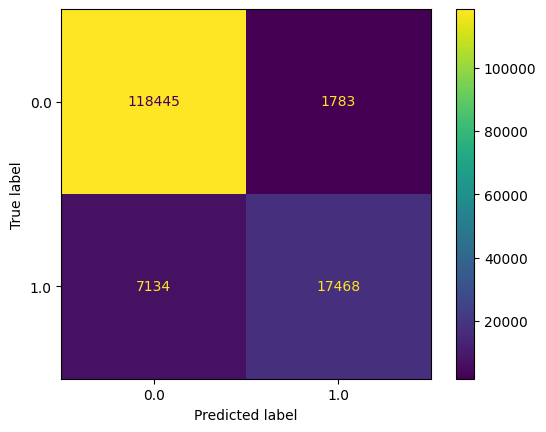

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

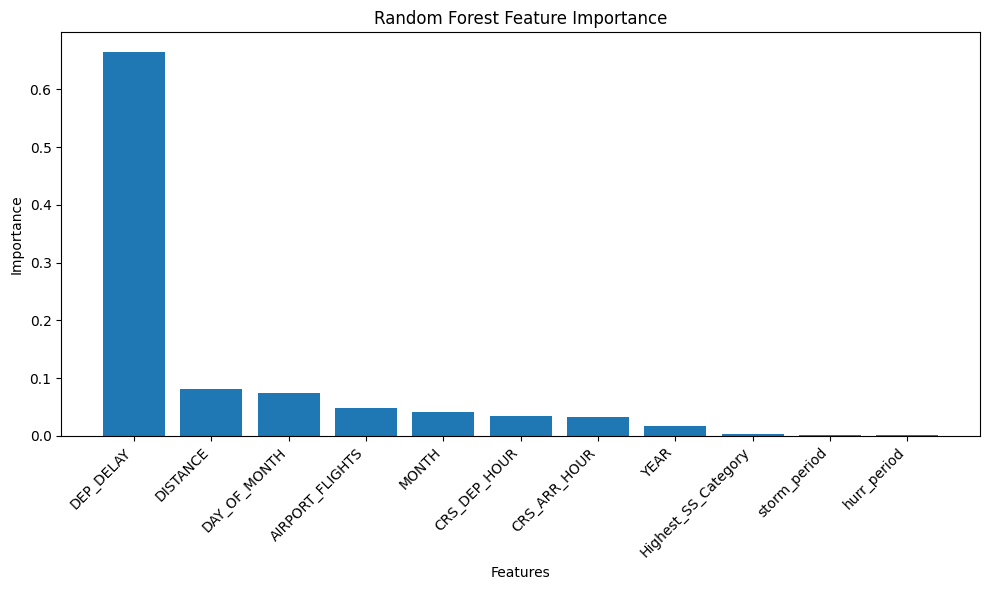

In [ ]:
import matplotlib.pyplot as plt

f = []

for i in X:
  f.append(i)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': f, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# whether there is a hurricane in that month has little impact on whether there is an arrival delay
# otherwise, the most important feature for predicting if there is an arrival delay is the departure delay
# if we didn't know departure delay, we can't predict well if there will be an arrival delay with the other features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ft = features[features['ARR_DEL15'].notna()]

#first, we will try to predict if a flight will arrive late or not
y = ft['ARR_DELAY']


# update hurricane day and storm day
ft['HURRICANE_DAY'].fillna(999999, inplace=True)
ft['STORM_DAY'].fillna(999999, inplace=True)

# replace NAs with 0
ft.fillna(0, inplace=True)

# add a feature hurr_period, 1 if there is a hurricane 1 day before to 5 days after scheduled flight, 0 if not
ft['hurr_period'] = np.where((ft['HURRICANE_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['HURRICANE_DAY']+5)
                             , 1, 0)

# add a feature storm_period, 1 if there is a storm 1 day before to 5 days after scheduled flight, 0 if not
ft['storm_period'] = np.where((ft['STORM_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['STORM_DAY']+5)
                             , 1, 0)

#choose appropriate features (what we know before flight lands)
X = ft.drop(columns=['MKT_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST',
                           'DEST_STATE_NM', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_DELAY',
                           'ARR_DEL15', 'ARR_DELAY_GROUP', 'DISTANCE_GROUP',
                           'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                           'LATE_AIRCRAFT_DELAY', 'main_cause', 'Hurricane'
                           , 'Central_Pressure', 'Max_Wind', 'SS',
                     'AIR_TIME', 'AIRPORT_SIZE_GROUP',
                     'storm', 'HURRICANE_DAY', 'STORM_DAY',
'Highest_SS_Category'])


# replace delay NAs with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

for i in X:
  print(i)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

<ipython-input-38-c6d11db45f7c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-c6d11db45f7c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-c6d11db45f7c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-c6d11db45f7c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

YEAR
MONTH
DAY_OF_MONTH
DEP_DELAY
DISTANCE
CRS_DEP_HOUR
CRS_ARR_HOUR
AIRPORT_FLIGHTS
hurr_period
storm_period
Mean Squared Error: 167.44504144437457
Coefficients: [ 4.00766207e-02  1.24422016e-01  8.51950385e-03  1.00501608e+00
 -2.90947203e-03 -6.27698243e-02  1.64293995e-02  2.54545792e-06
  1.25064234e+00  8.50710004e-01]
Intercept: -85.0175003713637


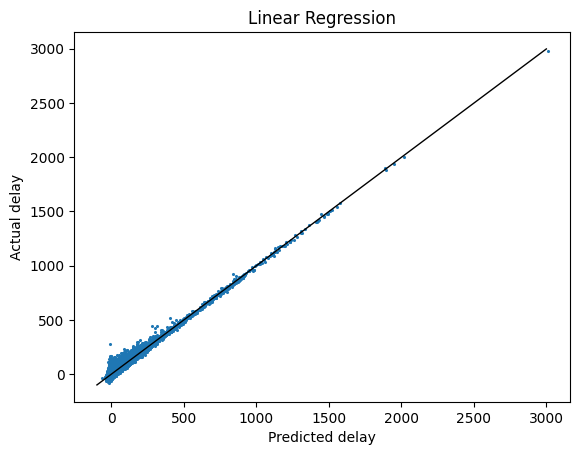

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(predictions, y_test, s=1.5)
plt.xlabel('Predicted delay')
plt.ylabel('Actual delay')
plt.title('Linear Regression')

b, a = np.polyfit(predictions, y_test, deg=1)
xseq = np.linspace(-100, 3000)
plt.plot(xseq, a + b * xseq, color="k", lw=1)

plt.show()


In [ ]:
# try to predict delays for months and states affected by hurricanes

# look at flights that arrived
ft = features[features['ARR_DEL15'].notna()]

# look at flights to Texas but not from Texas
ft = ft[ft['DEST_STATE_NM'] == 'Texas']
ft = ft[ft['ORIGIN_STATE_NM'] != 'Texas']

#we will try to predict if a state is hurricane prone
ft['hurricane_prone'] = np.where(
    (np.isin(ft['ORIGIN_STATE_NM'], ['Florida', 'Louisiana', 'Texas', 'North Carolina','South Carolina', 'Alabama', 'Mississippi', 'Georgia'])),
    1, 0)

y = ft['hurricane_prone']

# update hurricane day and storm day
ft['HURRICANE_DAY'].fillna(999999, inplace=True)
ft['STORM_DAY'].fillna(999999, inplace=True)

# replace NAs with 0
ft.fillna(0, inplace=True)

# add a feature hurr_period, 1 if there is a hurricane 1 day before to 5 days after scheduled flight, 0 if not
ft['hurr_period'] = np.where((ft['HURRICANE_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['HURRICANE_DAY']+5)
                             , 1, 0)

# add a feature storm_period, 1 if there is a storm 1 day before to 5 days after scheduled flight, 0 if not
ft['storm_period'] = np.where((ft['STORM_DAY']-1 <= ft['DAY_OF_MONTH']) & (ft['DAY_OF_MONTH'] <= ft['STORM_DAY']+5)
                             , 1, 0)


#choose appropriate features (what we know before flight lands)
X = ft.drop(columns=['MKT_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_STATE_NM', 'DEST',
                           'DEST_STATE_NM', 'DEP_DELAY_GROUP', 'DEP_DEL15',
                           'ARR_DEL15', 'ARR_DELAY_GROUP',
                           'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
                           'LATE_AIRCRAFT_DELAY', 'main_cause', 'Hurricane',
                     'AIR_TIME', 'Central_Pressure', 'Max_Wind',
                     'SS', 'Highest_SS_Category', 'AIRPORT_FLIGHTS',
                     'hurricane_prone', 'DISTANCE', 'storm',
                     'STORM_DAY', 'HURRICANE_DAY'])

#print features
for i in X:
  print(i)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#print(ft)
#print(ft[ft['hurr_period']==1])

YEAR
MONTH
DAY_OF_MONTH
DEP_DELAY
ARR_DELAY
DISTANCE_GROUP
WEATHER_DELAY
CRS_DEP_HOUR
CRS_ARR_HOUR
AIRPORT_SIZE_GROUP
hurr_period
storm_period


In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     44281
           1       0.82      0.77      0.79     17882

    accuracy                           0.88     62163
   macro avg       0.86      0.85      0.86     62163
weighted avg       0.88      0.88      0.88     62163



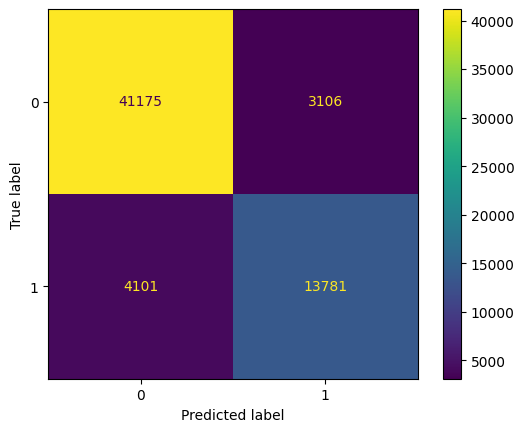

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

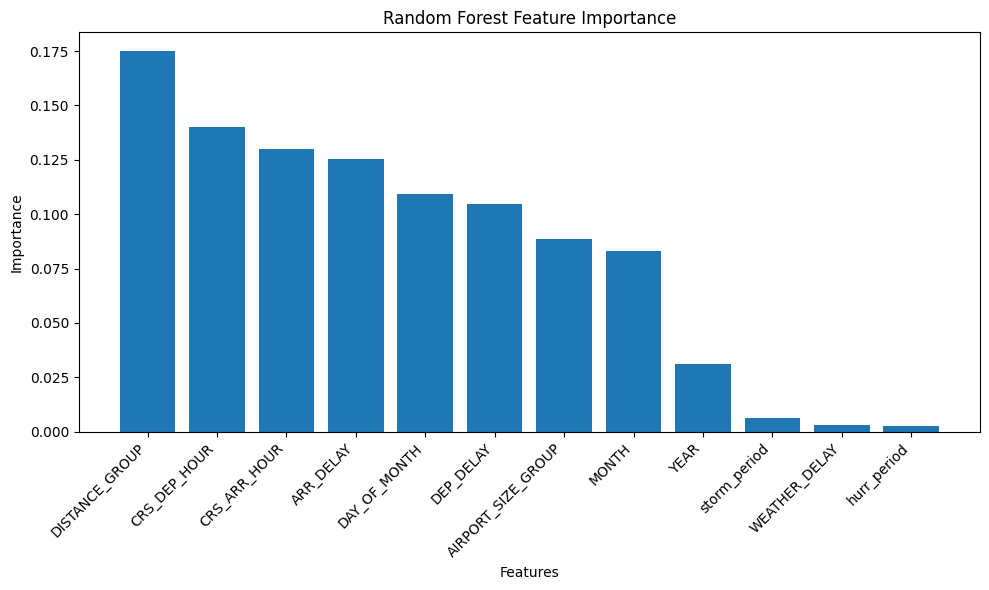

In [ ]:
import matplotlib.pyplot as plt

# feature importances chart
f = []

for i in X:
  f.append(i)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': f, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# why is hurricane information so bad at predicting delay time?
# it might be because flights are cancelled rather than delayed
# we are not looking at a localized area, but rather the entirety of Texas
# there may be certain airports that are more affected than others
# the prediction for late arrivals seems to depend a lot on departure delay
# besides departure delay, we can't predict well if a plane will arrive late or not
# there also are not that many hurricanes - only a few days get affected in a year